# ***Heart Attack Analysis & Prediction***

Data Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd

In [4]:
#df = pd.read_csv('/content/drive/MyDrive/heart-disease-uci-dataset.csv')
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv')

In [ ]:
# Exploring the first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Exploring the last 5 rows of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0



*   age: The person's age in years
*   sex: The person's sex (1 = male, 0 = female)
*   cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
*   trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
*   chol: The person's cholesterol measurement in mg/dl
*   fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
*   restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
*   thalach: The person's maximum heart rate achieved
*   exang: Exercise induced angina (1 = yes; 0 = no)
*   oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
*   slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
*   ca: The number of major vessels (0-3)
*   thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
*   target: Heart disease (0 = no, 1 = yes)






In [ ]:

#Printing the Dimensions of the dataframe (rows, columns)
#It shows the number of rows and columns in a dataset
print(df.shape)

(303, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Exploring the statistics of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
!pip install pandas-profiling
import pandas_profiling as pp
pp.ProfileReport(df)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 61.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fd99caecd9af7f1bdf073efce14269fde38cc809e48457

<ipython-input-9-d5bc4ed6b168>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## ***2. Exploratory Data Analysis ***

In [5]:
df_cleaned = df.copy()

In [ ]:
# Unit Tests
assert isinstance(df_cleaned, pd.DataFrame)
assert df_cleaned.shape == df.shape

<Axes: xlabel='target', ylabel='count'>

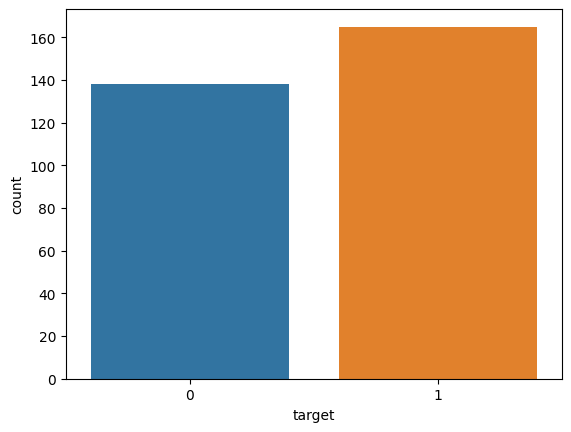

In [ ]:
# Exploring the distribution of the target variable
import seaborn as sns
sns.countplot(x="target", data=df_cleaned)


<Axes: >

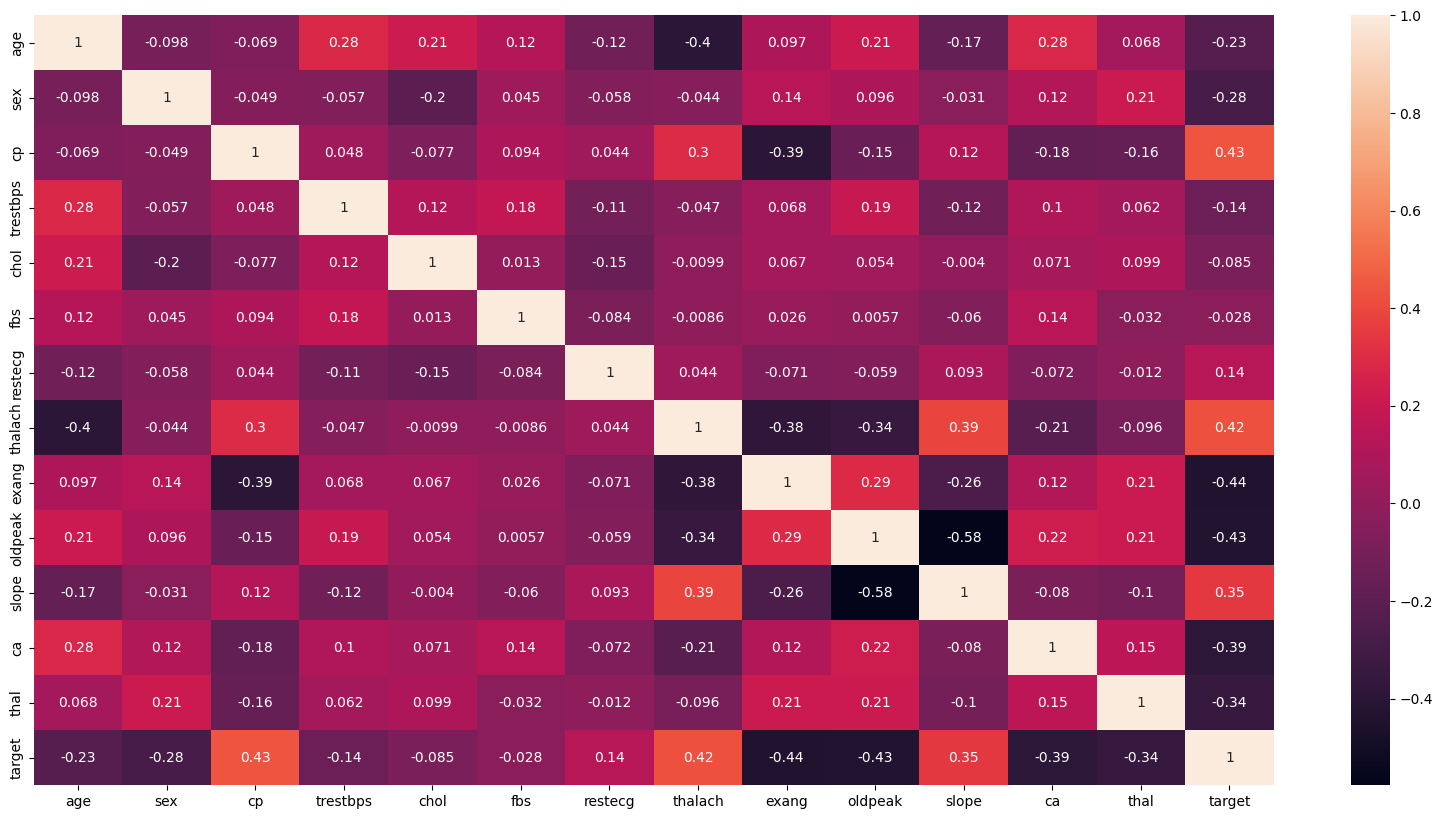

In [ ]:
# Exploring the correlation between variables using a heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df_cleaned.corr(), annot=True)

Exploring the correlation between variables using heatmaps tells us about the strength and direction of the linear relationship between pairs of variables. Heatmaps provide a visual representation of the correlation matrix where a higher correlation value is indicated by a darker color. This helps us identify which variables are positively or negatively correlated with each other and can provide insights into potential multicollinearity issues in our dataset. By understanding the correlation between variables, we can better understand how they may influence each other and potentially affect our target variable.

<Axes: xlabel='target', ylabel='age'>

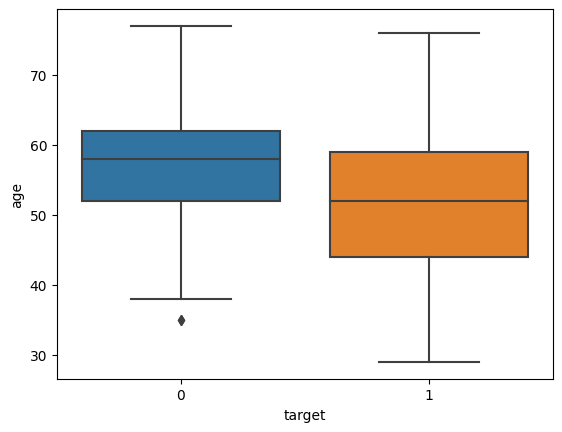

In [ ]:
# Exploring the relationship between age and target variable
sns.boxplot(x='target', y='age', data=df_cleaned)

The relationship between age and the target variable (presence or absence of heart disease) tells us whether there is an association between age and the risk of developing heart disease. In the exploratory data analysis code provided earlier, this relationship is explored using a boxplot.

If the boxplot shows that there is a significant difference in age between the two groups (presence or absence of heart disease), then it suggests that age may be a significant factor in predicting the presence of heart disease. For example, if the boxplot shows that individuals with heart disease tend to be older than those without heart disease, it suggests that age may be a risk factor for developing heart disease.

On the other hand, if the boxplot shows no significant difference in age between the two groups, then age may not be a significant factor in predicting the presence of heart disease. However, this does not necessarily mean that age is not a risk factor for heart disease, as there may be other factors that influence the relationship between age and heart disease.

Overall, exploring the relationship between age and the target variable is an important step in understanding the risk factors associated with heart disease and can provide valuable insights for developing effective prevention and treatment strategies.

<Axes: xlabel='target', ylabel='thalach'>

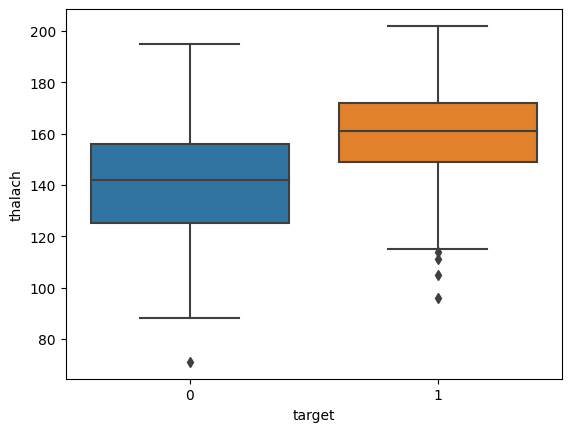

In [ ]:
# Exploring the relationship between maximum heart rate achieved and target variable
sns.boxplot(x='target', y='thalach', data=df_cleaned)

Exploring the relationship between maximum heart rate achieved and the target variable tells us whether there is an association between maximum heart rate achieved and the risk of developing heart disease. The boxplot helps us to understand if individuals with heart disease have a significantly different maximum heart rate achieved compared to those without heart disease. If there is a significant difference, it suggests that maximum heart rate achieved could be a potential predictor of heart disease. This information can be used to develop effective prevention and treatment strategies for heart disease.

<Axes: xlabel='cp', ylabel='count'>

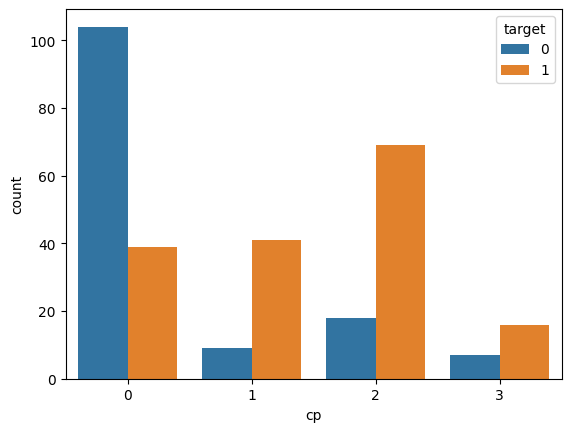

In [ ]:
# Exploring the relationship between chest pain type and target variable
sns.countplot(x='cp', hue='target', data=df_cleaned)

Exploring the relationship between chest pain type and the target variable tells us whether there is an association between the type of chest pain experienced by individuals and the risk of developing heart disease. This information can provide insights into potential symptoms and risk factors associated with heart disease.

<Axes: xlabel='exang', ylabel='count'>

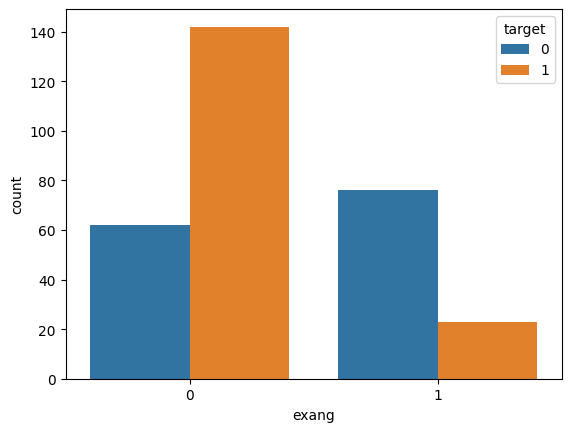

In [ ]:
# Exploring the relationship between exercise induced angina and target variable
sns.countplot(x='exang', hue='target', data=df_cleaned)

Exploring the relationship between exercise-induced angina and the target variable can provide valuable insights into the association between chest pain or discomfort during exercise and the risk of developing heart disease. By analyzing this relationship, we can identify potential symptoms and risk factors associated with heart disease, such as reduced blood flow to the heart during exercise. This information can be used to develop effective prevention and treatment strategies for heart disease and improve overall patient outcomes.

# Training the model - SVM

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Define features and target
X1 = df_cleaned.drop(columns='target')
y1 = df_cleaned['target']

# Split the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Apply standard scaling to the training and testing data
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

# Define the model
svm = SVC(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Train the model
grid_search.fit(X1_train, y1_train)

# Print the best parameters found
print('Best parameters for Model 1:')
print(grid_search.best_params_)

# Use the best model to make predictions
best_svm = grid_search.best_estimator_
y1_pred = best_svm.predict(X1_test)

# Print the classification report and confusion matrix
print('Model 1 Results:')
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))

Best parameters for Model 1:
{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Model 1 Results:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[26  3]
 [ 5 27]]


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define features and target
X2 = df_cleaned.drop(columns='target')
y2 = df_cleaned['target']

# Feature Engineering
X2['trestbps_to_age'] = X2['trestbps'] / X2['age']
X2['oldpeak_to_thalach'] = X2['oldpeak'] / X2['thalach']
X2['sex_and_cp'] = X2['sex'] & X2['cp']

# Split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Define the preprocessing steps and classifier
steps = [('scaler', StandardScaler()),
         ('classifier', SVC(class_weight='balanced', random_state=42))]

# Create the pipeline
pipeline = Pipeline(steps=steps)

# Define the hyperparameters to tune
param_grid = {'classifier__C': [0.5, 1, 1.5, 2], 
              'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
              'classifier__degree': [2, 3, 4],
              'classifier__gamma': ['scale', 'auto']}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Train the model
grid_search.fit(X2_train, y2_train)

# Print the best parameters found
print('Best parameters for Model 2:')
print(grid_search.best_params_)

# Use the best model to make predictions
best_svm = grid_search.best_estimator_
y2_pred = best_svm.predict(X2_test)

# Print the classification report and confusion matrix
print('Model 2 Results:')
print(classification_report(y2_test, y2_pred))
print(confusion_matrix(y2_test, y2_pred))

Best parameters for Model 2:
{'classifier__C': 1, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'sigmoid'}
Model 2 Results:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

[[25  4]
 [ 5 27]]


In [6]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Define features and target
X3 = df_cleaned.drop(columns='target')
y3 = df_cleaned['target']

# Create interaction between cp and exang
X3['cp_exang'] = X3['cp'] * X3['exang']

# Split the data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

# Define the pipeline
pipe = Pipeline(steps=[('classifier', SVC())])

# Define the hyperparameters to tune
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100],
              'classifier__gamma': ['scale', 'auto'],
              'classifier__degree': [2, 3, 4],
              'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Use StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipe, param_grid, cv=stratified_kfold, scoring='accuracy')

# Train the model
grid_search.fit(X3_train, y3_train)

# Print the best parameters found
print('Best parameters for Model 3:')
print(grid_search.best_params_)

# Use the best model to make predictions
best_model3 = grid_search.best_estimator_
y3_pred = best_model3.predict(X3_test)

# Print the classification report and confusion matrix
print('Model 3 Results:')
print(classification_report(y3_test, y3_pred))
print(confusion_matrix(y3_test, y3_pred))


Best parameters for Model 3:
{'classifier__C': 1, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Model 3 Results:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

[[25  4]
 [ 5 27]]
